# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns

In [85]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [86]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [88]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

#### Answers: 

* Existen 10 columnas explicadas en la descripción
* 442 registros de diabetes['data'] que permiten predecir valores del diabetes['target'] 
* 442

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [90]:
diabetes['data'].shape

(442, 10)

In [92]:
diabetes['target'].shape

(442,)

## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [94]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [95]:
diabetes_df = pd.DataFrame(data= diabetes['data'], columns= diabetes['feature_names'])

In [97]:
diabetes_df['disease progression'] = diabetes['target']

In [98]:
diabetes_df

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  disease progression  
0   -0.002592  0.019908 -0.017646                151.0  
1   -0.039493 -0.068330 -0.092204                 75.0  
2   -0.002592  0.002864 -0.025930                141.0  
3    0.034309  0.022692 -0.009362                206.0  
4   -0.002592 -0.031991 -0.046641                135.0  
..        ...       ...       ...                  ...  
437 -0.002592  0.031193  0.007207                178.0  
438  0.034309 -0.018118  0.044485                104.0  
439 -0.011080 -0.046879  0.015491                132.0  
440  0.026560  0.044528 -0.025930                220.0  
441 -0.039493 -0.004220  0.003064                 57.0  

[442 rows x 11 columns]

In [107]:
X = diabetes_df.iloc[:, :-1]
Y = diabetes_df['disease progression']

In [110]:
print(X.shape)
print(Y.shape)

(442, 10)
(442,)


#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [ ]:
from sklearn.linear_model import LinearRegression

In [99]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [100]:
from sklearn.model_selection import train_test_split

In [111]:
diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(X, Y, test_size= 20, shuffle= False)

In [117]:
diabetes_df.iloc[-1]

age                    -0.045472
sex                    -0.044642
bmi                    -0.073030
bp                     -0.081414
s1                      0.083740
s2                      0.027809
s3                      0.173816
s4                     -0.039493
s5                     -0.004220
s6                      0.003064
disease progression    57.000000
Name: 441, dtype: float64

In [116]:
diabetes_data_test.iloc[-1]

age   -0.045472
sex   -0.044642
bmi   -0.073030
bp    -0.081414
s1     0.083740
s2     0.027809
s3     0.173816
s4    -0.039493
s5    -0.004220
s6     0.003064
Name: 441, dtype: float64

In [118]:
print('Shape X train', diabetes_data_train.shape)
print('Shape X test', diabetes_data_test.shape)
print('Shape Y train', diabetes_target_train.shape)
print('Shape Y test', diabetes_target_train.shape)

Shape X train (422, 10)
Shape X test (20, 10)
Shape Y train (422,)
Shape Y test (422,)


Explore your dataset before training a model

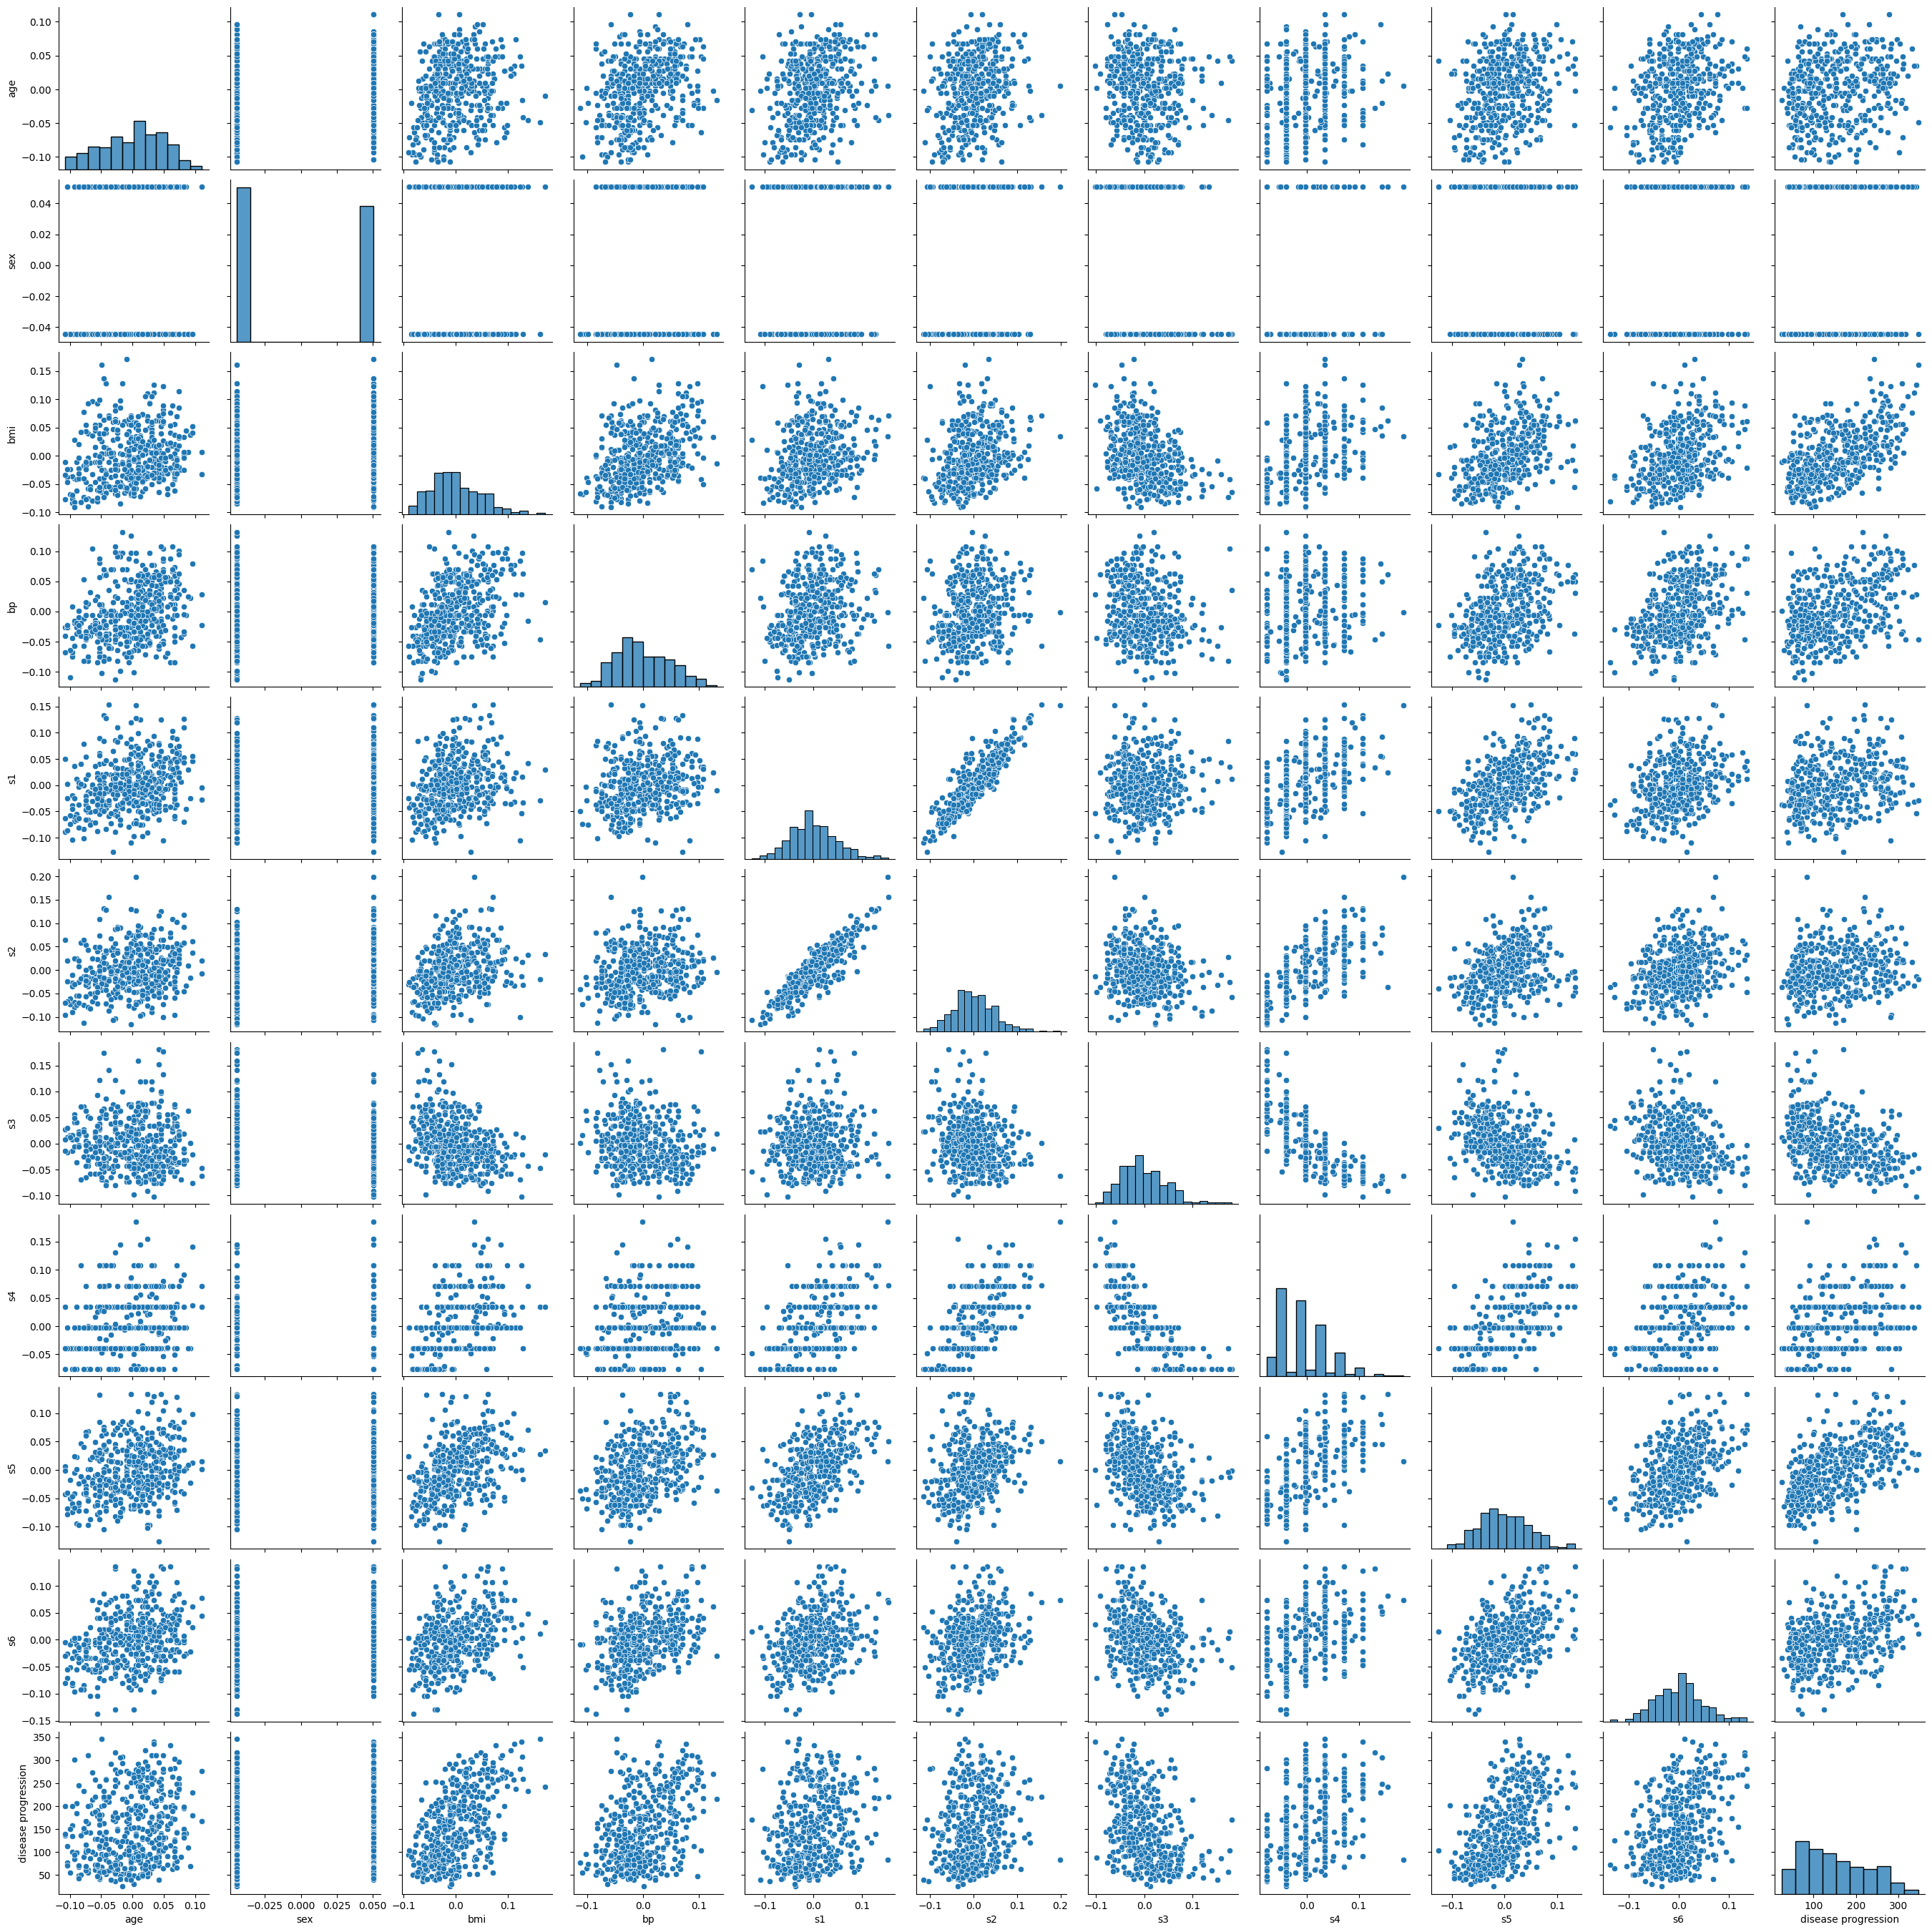

In [120]:
sns.pairplot(diabetes_df)

In [123]:
import matplotlib.pyplot as plt

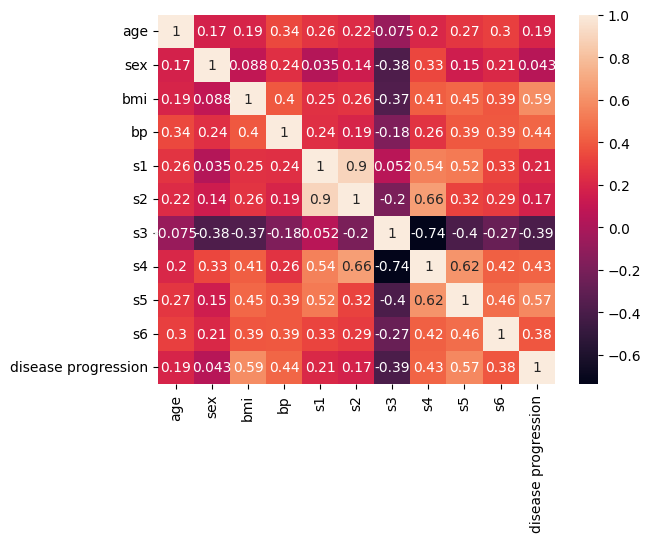

In [125]:
plt.Figure(figsize= (15, 15))
sns.heatmap(diabetes_df.corr(), annot= True);

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [126]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

LinearRegression()

In [127]:
print(diabetes_model.intercept_)
print(diabetes_model.coef_)

152.76430691633442
[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

y = a + bx1 + cx2...

In [128]:
prediction = diabetes_model.predict(diabetes_data_test)

#### Print your `diabetes_target_test` and compare with the prediction. 

In [129]:
errors_df = pd.DataFrame({'actual_values': diabetes_target_test, 'predictions': prediction})

In [131]:
errors_df['error'] = errors_df['actual_values'] - errors_df['predictions']

In [132]:
errors_df

actual_values  predictions      error
422          233.0   197.618469  35.381531
423           91.0   155.439793 -64.439793
424          111.0   172.886651 -61.886651
425          152.0   111.535373  40.464627
426          120.0   164.800548 -44.800548
427           67.0   131.069549 -64.069549
428          310.0   259.122378  50.877622
429           94.0   100.479352  -6.479352
430          183.0   117.060105  65.939895
431           66.0   124.305036 -58.305036
432          173.0   218.366328 -45.366328
433           72.0    61.198313  10.801687
434           49.0   132.250468 -83.250468
435           64.0   120.333292 -56.333292
436           48.0    52.544587  -4.544587
437          178.0   194.037981 -16.037981
438          104.0   102.571397   1.428603
439          132.0   123.566050   8.433950
440          220.0   211.034632   8.965368
441           57.0    52.603357   4.396643

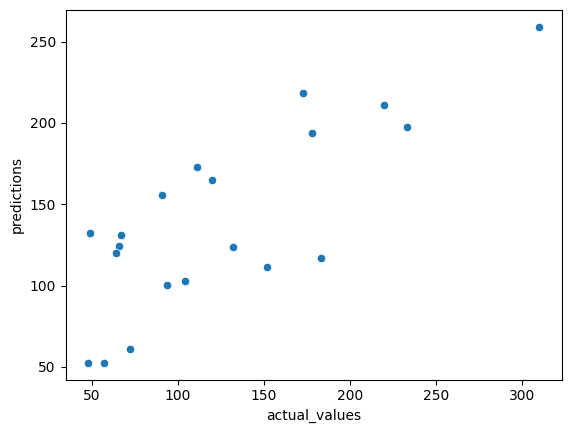

In [135]:
sns.scatterplot(x= errors_df['actual_values'], y= errors_df['predictions']);

#### Is `diabetes_target_test` exactly the same as the model prediction?

In [ ]:
#No

## Extra: Interpreta tu modelo ¿Cuáles son las variables más importantes?

In [140]:
features_std = pd.DataFrame(abs(diabetes_model.coef_), diabetes_data_train.columns, columns=['coefficient'])

features_std = features_std.sort_values('coefficient', ascending=True)

In [147]:
features_std.index[-4::]

Index(['s2', 'bmi', 's5', 's1'], dtype='object')

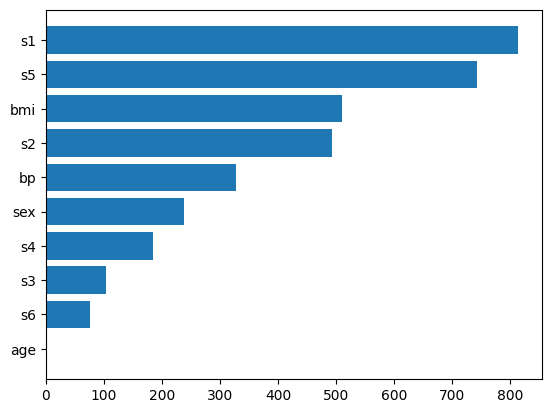

In [141]:
plt.barh(features_std.index, features_std.coefficient);

In [142]:
from sklearn.metrics import mean_absolute_error

In [144]:
print(mean_absolute_error(diabetes_target_test, prediction))

36.61017556715884


## Iteramos con un nuevo modelo ¿Podemos mejorar el anterior?

In [181]:
X_2 = diabetes_df[features_std.index[-4::]]

In [182]:
X_2

s2       bmi        s5        s1
0   -0.034821  0.061696  0.019908 -0.044223
1   -0.019163 -0.051474 -0.068330 -0.008449
2   -0.034194  0.044451  0.002864 -0.045599
3    0.024991 -0.011595  0.022692  0.012191
4    0.015596 -0.036385 -0.031991  0.003935
..        ...       ...       ...       ...
437 -0.002566  0.019662  0.031193 -0.005697
438  0.079165 -0.015906 -0.018118  0.049341
439 -0.013840 -0.015906 -0.046879 -0.037344
440  0.015283  0.039062  0.044528  0.016318
441  0.027809 -0.073030 -0.004220  0.083740

[442 rows x 4 columns]

In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y, test_size = 20, shuffle= False)

In [184]:
diabetes_model_2 = LinearRegression()

In [185]:
diabetes_model_2.fit(X_train, Y_train)

LinearRegression()

In [186]:
prediction_2 = diabetes_model_2.predict(X_test)

In [187]:
print(mean_absolute_error(Y_test, prediction_2))

36.73800808622179
